In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Checking our Results

In this notebook we will try to see how the distances we obtained look like on the map of the FUA.

## 1. Getting the files

In [2]:
def get_files(fua_code):
    
    buffered_boundary = gpd.read_file('../data/d03_intermediate/FUA-buffered-shapefile/FUA-buffered.shp').set_index('fuacode').loc[[fua_code]]
    walk_graph = ox.load_graphml('../data/d03_intermediate/FUA-networks/walk/'+fua_code+'.graphml')
    drive_graph = ox.load_graphml('../data/d03_intermediate/FUA-networks/drive/'+fua_code+'.graphml')
    OD_matrix = pd.read_csv('../data/d04_final-OD-matrices/OD-per-FUA/'+fua_code+'_full-ODmatrix.csv').drop('Unnamed: 0', axis=1)
    
    return buffered_boundary, walk_graph, drive_graph, OD_matrix

 We will use two functional urban areas as example: FUA80 and FUA81.

In [3]:
buffered_boundary_80, walk_graph_80, drive_graph_80, OD_matrix_80 = get_files('USA80')
buffered_boundary_81, walk_graph_81, drive_graph_81, OD_matrix_81 = get_files('USA81')

These OD matrices will have columns telling us whether the commute was made by walking or driving (note that we concatatenated the datafames of walking and driving vertically so that all the driving come first), columns with the OSMid of the closest node in the correponding network, and the distance in meters

In [4]:
OD_matrix_80.head()

safegraph_place_id  census_block_group  \
0  sg:001855be013b421688f5f8c2e724d076        550250114021   
1  sg:001855be013b421688f5f8c2e724d076        550250022003   
2  sg:001855be013b421688f5f8c2e724d076        550250115032   
3  sg:001855be013b421688f5f8c2e724d076        550250118001   
4  sg:001855be013b421688f5f8c2e724d076        551050029003   

                          top_category   latitude  longitude fuacode  \
0  Restaurants and Other Eating Places  43.172181 -89.265802   USA80   
1  Restaurants and Other Eating Places  43.172181 -89.265802   USA80   
2  Restaurants and Other Eating Places  43.172181 -89.265802   USA80   
3  Restaurants and Other Eating Places  43.172181 -89.265802   USA80   
4  Restaurants and Other Eating Places  43.172181 -89.265802   USA80   

    intptlat   intptlon   walk  origin_node  destination_node   distance  
0  43.126509 -89.271130  False   3825890239        1684819350   6421.298  
1  43.120499 -89.366947  False     53638087        1684819350  12627.421  
2  43.201220 -89.244345  False   1684995503        1684819350   4636.606  
3  43.214106 -89.098972  False     53705859        1684819350  19152.572  
4  42.783193 -89.312406  False    232256855        1684819350  50231.414

The two networks occupy the same boundary, but are strikingly different in density and capillarity (there are many often more walking paths, and those are also always bidirectional)

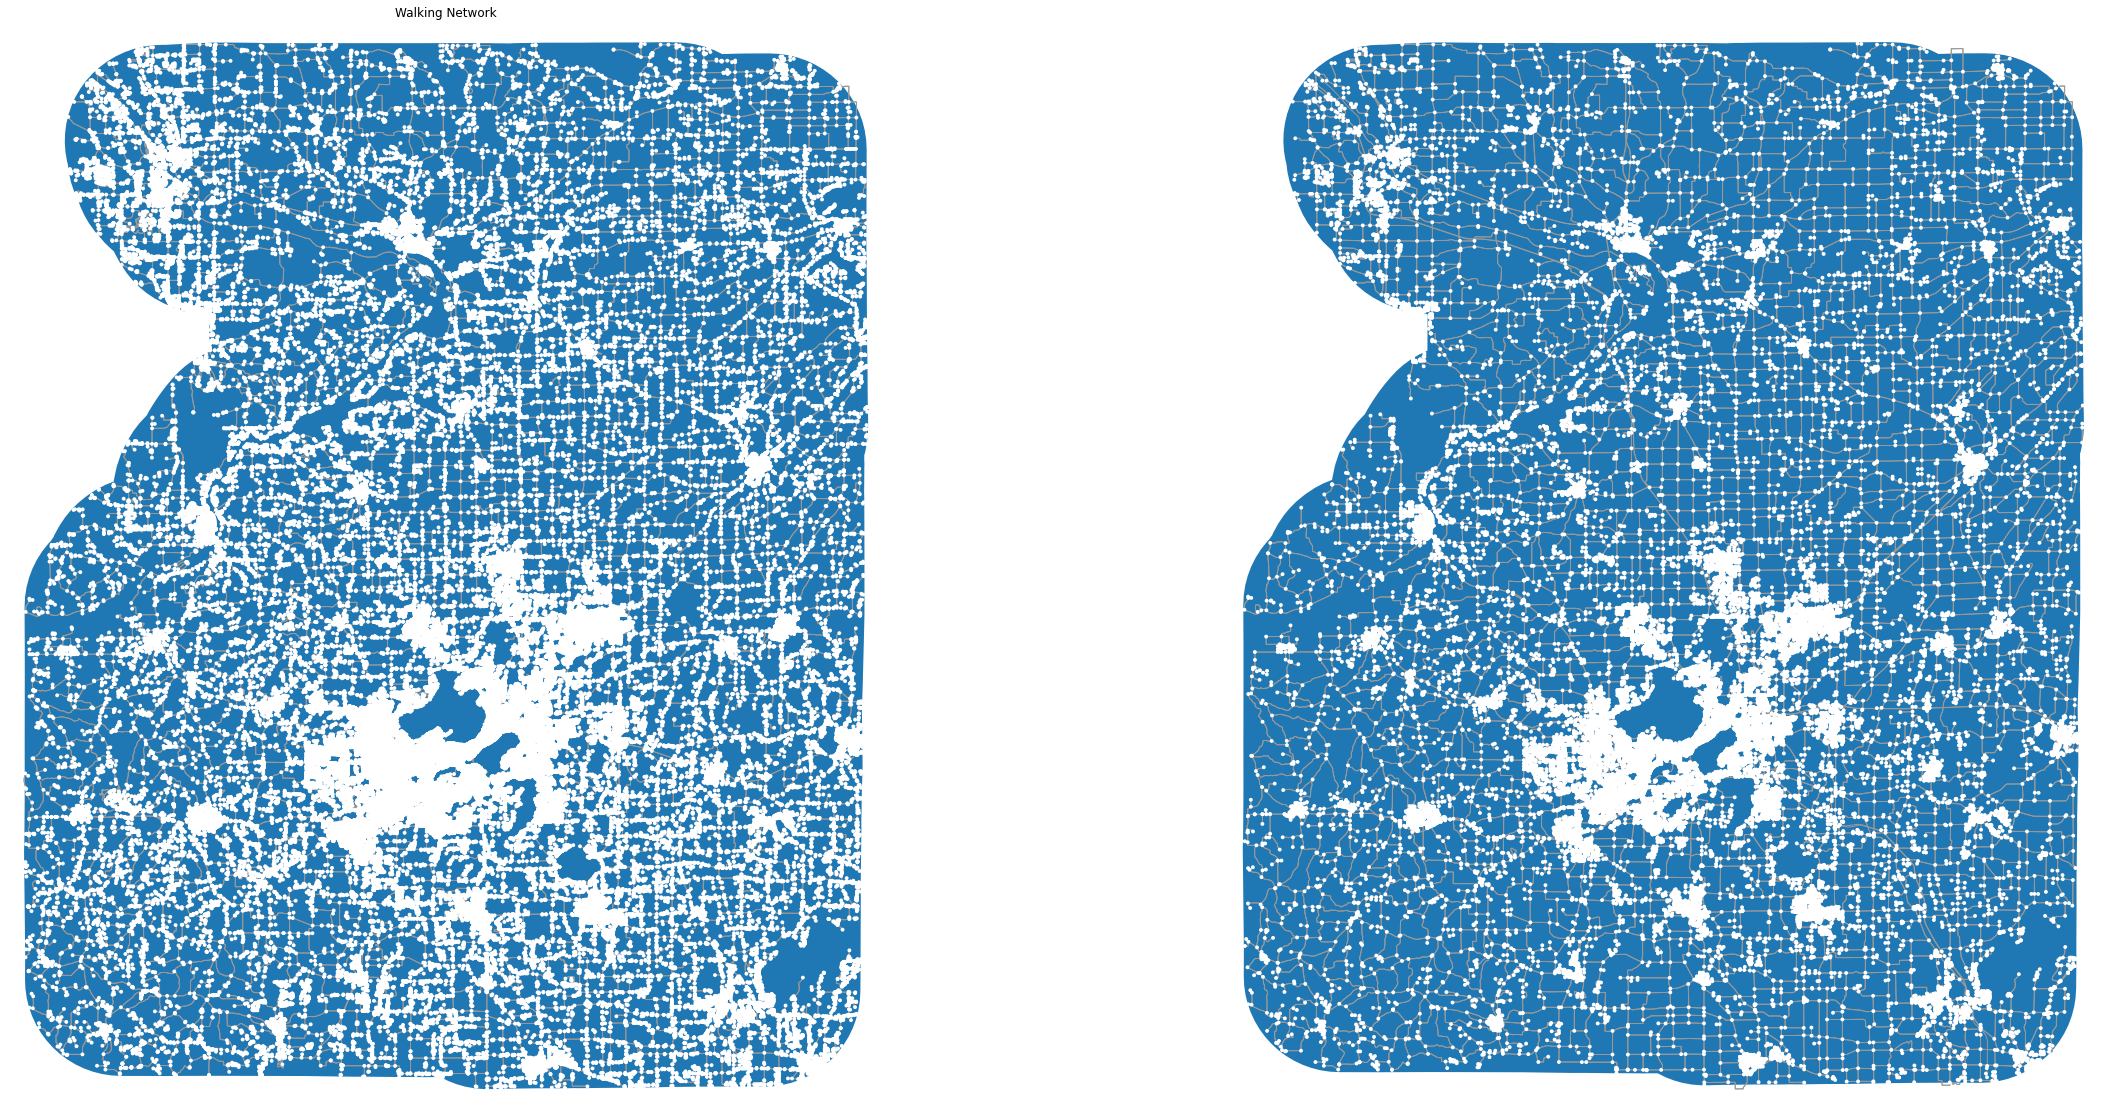

In [21]:
fig, Axes = plt.subplots(figsize=(40,20), ncols=2)

ax1 = buffered_boundary_80.plot(ax=Axes[0])
ax1 = ox.plot_graph(walk_graph_80, ax=ax1, close=False, show=False)[1]
ax1.title.set_text('Walking Network')

ax2 = buffered_boundary_80.plot(ax=Axes[1])
ax2 = ox.plot_graph(drive_graph_80, ax=ax2, close=False, show=False)[1]
ax2.title.set_text('Driving Network')

plt.show()

## 2. How many incorrect commuting mode rows?

In some cases, even though the commute was made "through walking", the distance is superior to 2,000 meters. This is because the walk vs. drive original split was made in terms of the straight line distance. We will need to select these columns and reapply the script. It is important to check that such rows are a minority.

In [5]:
bad_rows_80 = OD_matrix_80.loc[(OD_matrix_80['walk']==True) & (OD_matrix_80['distance'] > 2000)]

In [6]:
bad_rows_80

safegraph_place_id  census_block_group  \
33975  sg:0019073c3a6b4f47b31aae863a1fd8e9        550250113011   
33976  sg:0019073c3a6b4f47b31aae863a1fd8e9        550250113022   
33979  sg:0020ba99d61547aeb8dc4984409df935        550250006003   
33990  sg:00235c5b5ae4403abfa1fd20ccb69d01        550250012004   
33991  sg:0025699830dc410eaa82844eeeb8b360        550250119004   
...                                    ...                 ...   
39470  sg:98fcd66aa3da4e25acfea23a1bdc6c10        550250109011   
39472  sg:99129e09dffb46029ff3cc6ff49e68e9        550250016044   
39487  sg:991b900dca4948bbae8cf4e7ea77bca4        550250031001   
39490  sg:993bb6220d964c2795792c144d998c93        551110001001   
39491  sg:99538cfc23b745a1819c3c73eb22af1d        550219712001   

                                            top_category   latitude  \
33975  Museums, Historical Sites, and Similar Institu...  43.190772   
33976  Museums, Historical Sites, and Similar Institu...  43.190772   
33979  Museums, Historical Sites, and Similar Institu...  43.028188   
33990                Restaurants and Other Eating Places  43.074940   
33991  Museums, Historical Sites, and Similar Institu...  42.991451   
...                                                  ...        ...   
39470                Restaurants and Other Eating Places  43.075378   
39472                Restaurants and Other Eating Places  43.067537   
39487                    Health and Personal Care Stores  43.085170   
39490                            Religious Organizations  43.625231   
39491                            Child Day Care Services  43.323568   

       longitude fuacode   intptlat   intptlon  walk  origin_node  \
33975 -89.448029   USA80  43.205964 -89.448195  True   7794027730   
33976 -89.448029   USA80  43.184520 -89.431324  True   2521835313   
33979 -89.456800   USA80  43.019631 -89.462452  True   5569162367   
33990 -89.390787   USA80  43.064874 -89.404903  True   5489150623   
33991 -89.022372   USA80  42.984409 -89.028839  True   8124599136   
...          ...     ...        ...        ...   ...          ...   
39470 -89.528439   USA80  43.065130 -89.547971  True   5483831985   
39472 -89.408167   USA80  43.076617 -89.395020  True   2705034726   
39487 -89.277655   USA80  43.081103 -89.296367  True     53476533   
39490 -89.773420   USA80  43.617606 -89.789501  True   5754368622   
39491 -89.020823   USA80  43.339009 -89.011281  True   5033128161   

       destination_node  distance  
33975        2484168381  2235.279  
33976        2484168381  2152.622  
33979        5368464948  3488.850  
33990        3269859225  2226.806  
33991        2457606095  2016.856  
...                 ...       ...  
39470         443884009  2602.998  
39472        3811347658  2032.864  
39487        4184204415  2074.149  
39490        1347285687  4146.551  
39491        8163437082  2108.492  

[1417 rows x 12 columns]

How many rows do these represent in terms of all rows? Of all walking rows?

In [7]:
len(bad_rows_80)/len(OD_matrix_80)

0.03587977616286431

In [8]:
len(bad_rows_80)/len(OD_matrix_80.loc[OD_matrix_80['walk']])

0.25679594055817323

Now for the 81:

In [9]:
bad_rows_81 = OD_matrix_81.loc[(OD_matrix_81['walk']==True) & (OD_matrix_81['distance'] > 2000)]
print(len(bad_rows_81)/len(OD_matrix_81))
print(len(bad_rows_81)/len(OD_matrix_81.loc[OD_matrix_81['walk']]))

0.044413290340670125
0.4601975595583963


Although the bad rows represent a significant share of the walking patterns, they represent a very negligible share of the total patterns and thus have low computational cost. There is not many ways to improve on this filtering method, and we can see that in fact the amount of "bad" walking patterns with slightly too long distance is also very significant:

In [10]:
print(len(OD_matrix_80.loc[(OD_matrix_80['walk']==True) & (OD_matrix_80['distance'] > 2000) & (OD_matrix_80['distance'] < 2500)])/len(bad_rows_80))
print(len(OD_matrix_81.loc[(OD_matrix_81['walk']==True) & (OD_matrix_81['distance'] > 2000) & (OD_matrix_81['distance'] < 2500)])/len(bad_rows_81))

0.6224417784050812
0.4476010101010101


i.e. about half of the badly labeled walking patterns have a distance between 2 and 2.5km, which is just slightly above the intended 2km threshold.

## 3. How many incorrect centroids?

Let's start by visualizing the centroids and their assigned nodes:

In [31]:
def get_points(od_matrix, to_crs=None, as_gdf=True):
    
    places_pt = gpd.points_from_xy(x= od_matrix.longitude, y=od_matrix.latitude, crs='EPSG:4326')
    centroids_pt = gpd.points_from_xy(x= od_matrix.intptlon, y=od_matrix.intptlat, crs='EPSG:4326')

    if to_crs is not None:
        places_pt = places_pt.to_crs(to_crs)
        centroids_pt = centroids_pt.to_crs(to_crs)
        
    if as_gdf:
        places_pt = gpd.GeoDataFrame(od_matrix[['safegraph_place_id', 'top_category', 'destination_node', 'walk']], geometry=places_pt)
        centroids_pt = gpd.GeoDataFrame(od_matrix[['census_block_group', 'origin_node','walk']], geometry=centroids_pt)
        
    return places_pt, centroids_pt

In [32]:
places_80, centroids_80 = get_points(OD_matrix_80)
places_81, centroids_81 = get_points(OD_matrix_81)

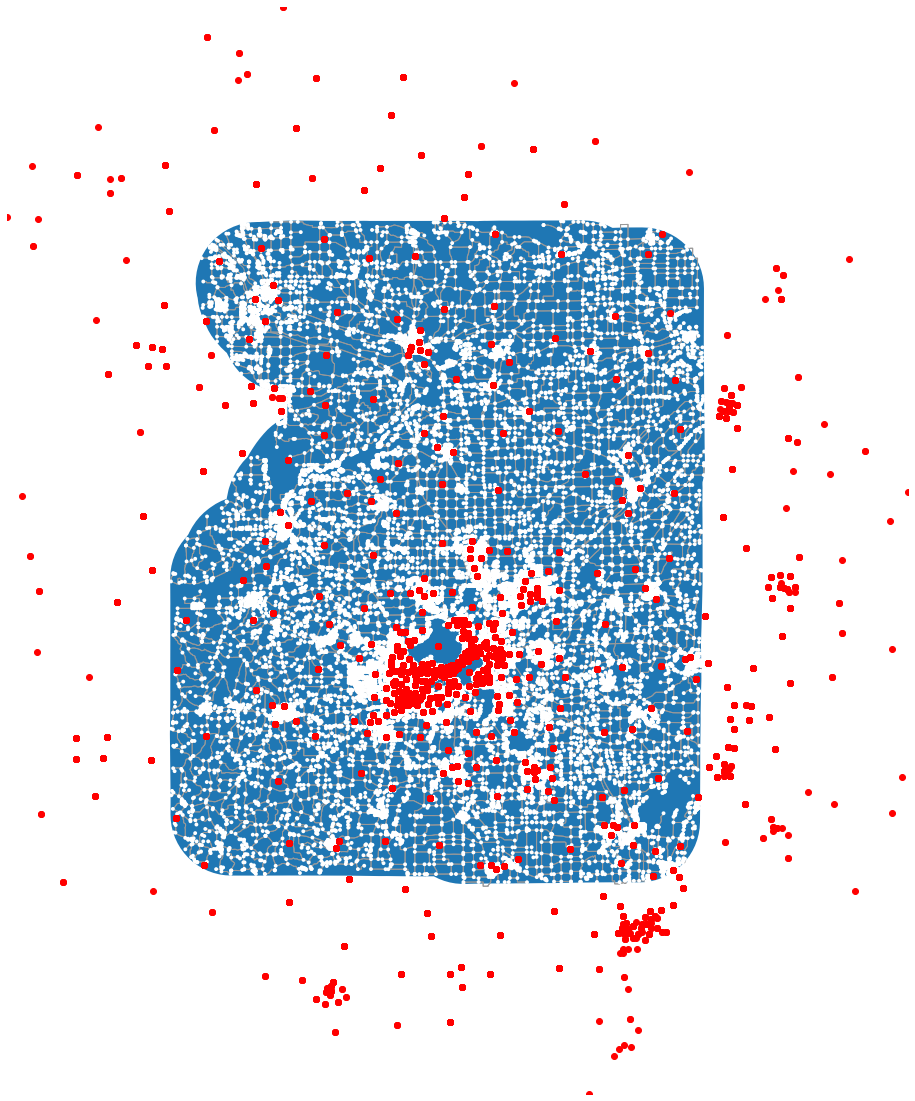

In [15]:
w, s, e, n = centroids_80.geometry.total_bounds

fig, ax = plt.subplots(figsize=(20,20))

ax1 = buffered_boundary_80.plot(ax=ax)
ax1 = ox.plot_graph(drive_graph_80, ax=ax1, close=False, show=False, bbox=(n, s, e, w))[1]
ax1 = centroids_80.plot(c='red', ax=ax)

plt.show()

There are many centroids outside of the buffered FUA, and in turn this creates necessairily bad assignments of closest nodes. For example:

In [47]:
centroids_80_unique = centroids_80[~centroids_80.walk].drop_duplicates(subset=['census_block_group']).set_index('census_block_group')

x_node = centroids_80_unique['origin_node'].apply(lambda osmid: drive_graph_80.nodes[osmid]['x'])
y_node = centroids_80_unique['origin_node'].apply(lambda osmid: drive_graph_80.nodes[osmid]['y'])

centroids_80_unique['node_geometry'] = gpd.points_from_xy(x=x_node, y=y_node, crs='EPSG:4326')

<AxesSubplot:>

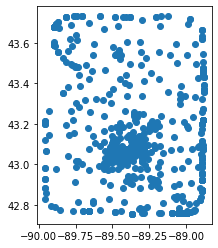

In [58]:
centroids_80_unique.node_geometry.plot()

These points should be cut out of the matrix (ideally, they would have been cut out before the distance computations to avoid spending time but that was ok and now we can actually assess what these external commutes are). We can do as such:

In [33]:
places_80

safegraph_place_id  \
0      sg:001855be013b421688f5f8c2e724d076   
1      sg:001855be013b421688f5f8c2e724d076   
2      sg:001855be013b421688f5f8c2e724d076   
3      sg:001855be013b421688f5f8c2e724d076   
4      sg:001855be013b421688f5f8c2e724d076   
...                                    ...   
39488  sg:991b900dca4948bbae8cf4e7ea77bca4   
39489  sg:991b900dca4948bbae8cf4e7ea77bca4   
39490  sg:993bb6220d964c2795792c144d998c93   
39491  sg:99538cfc23b745a1819c3c73eb22af1d   
39492  sg:99688b865e1a4daa954a97821eb8318e   

                                            top_category  destination_node  \
0                    Restaurants and Other Eating Places        1684819350   
1                    Restaurants and Other Eating Places        1684819350   
2                    Restaurants and Other Eating Places        1684819350   
3                    Restaurants and Other Eating Places        1684819350   
4                    Restaurants and Other Eating Places        1684819350   
...                                                  ...               ...   
39488                    Health and Personal Care Stores        4184204415   
39489                    Health and Personal Care Stores        4184204415   
39490                            Religious Organizations        1347285687   
39491                            Child Day Care Services        8163437082   
39492  Museums, Historical Sites, and Similar Institu...         244881902   

        walk                    geometry  
0      False  POINT (-89.26580 43.17218)  
1      False  POINT (-89.26580 43.17218)  
2      False  POINT (-89.26580 43.17218)  
3      False  POINT (-89.26580 43.17218)  
4      False  POINT (-89.26580 43.17218)  
...      ...                         ...  
39488   True  POINT (-89.27765 43.08517)  
39489   True  POINT (-89.27765 43.08517)  
39490   True  POINT (-89.77342 43.62523)  
39491   True  POINT (-89.02082 43.32357)  
39492   True  POINT (-89.50219 43.03847)  

[39493 rows x 5 columns]

Is the same true of places?

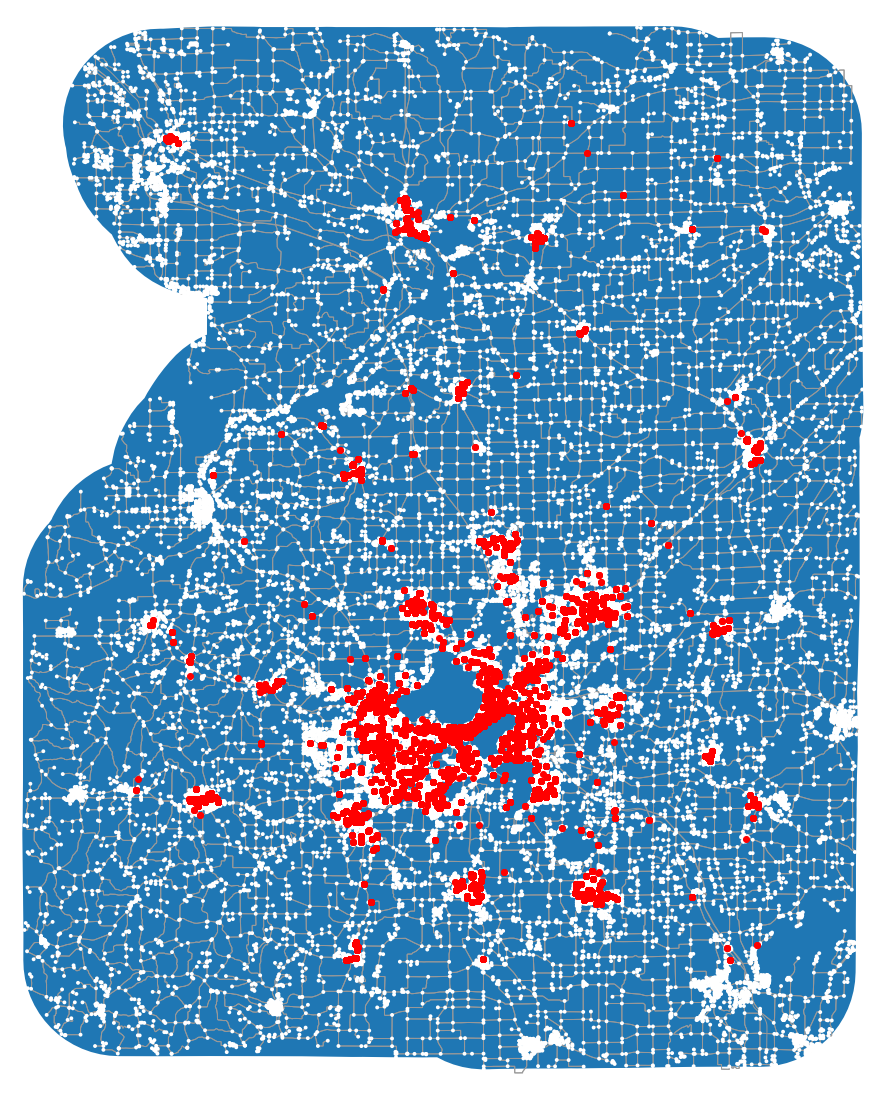

In [25]:
fig, ax = plt.subplots(figsize=(20,20))

ax = buffered_boundary_80.plot(ax=ax)
ax = ox.plot_graph(drive_graph_80, ax=ax, close=False, show=False)[1]
ax = places_80.plot(c='red', ax=ax)

plt.show()

No! Places are already taken only inside the FUA (even inside the unbuffered area) since that was how we collected the data from SafeGraph. We only need to restrict the matrix based on the centroids.